In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import data

In [98]:
data= pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [99]:
data.shape

(1000, 8)

In [100]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [101]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [102]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [104]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Cleaning the data

1. Check for any missing values

In [105]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

3. Relationship Analysis

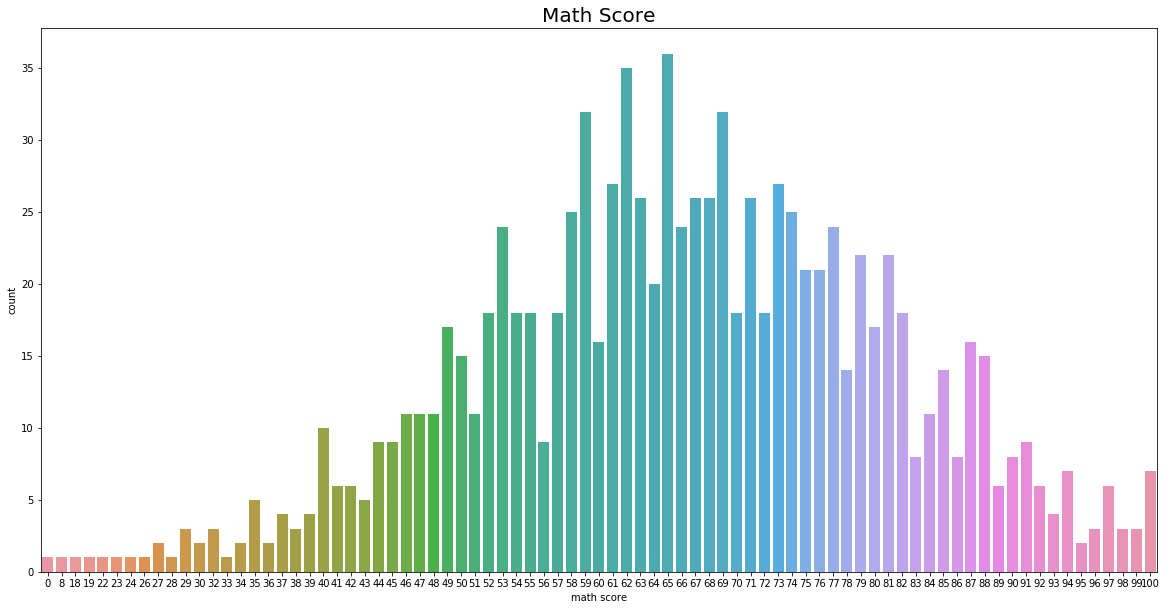

In [106]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['math score'])
plt.title('Math Score',fontsize = 20)
plt.show()

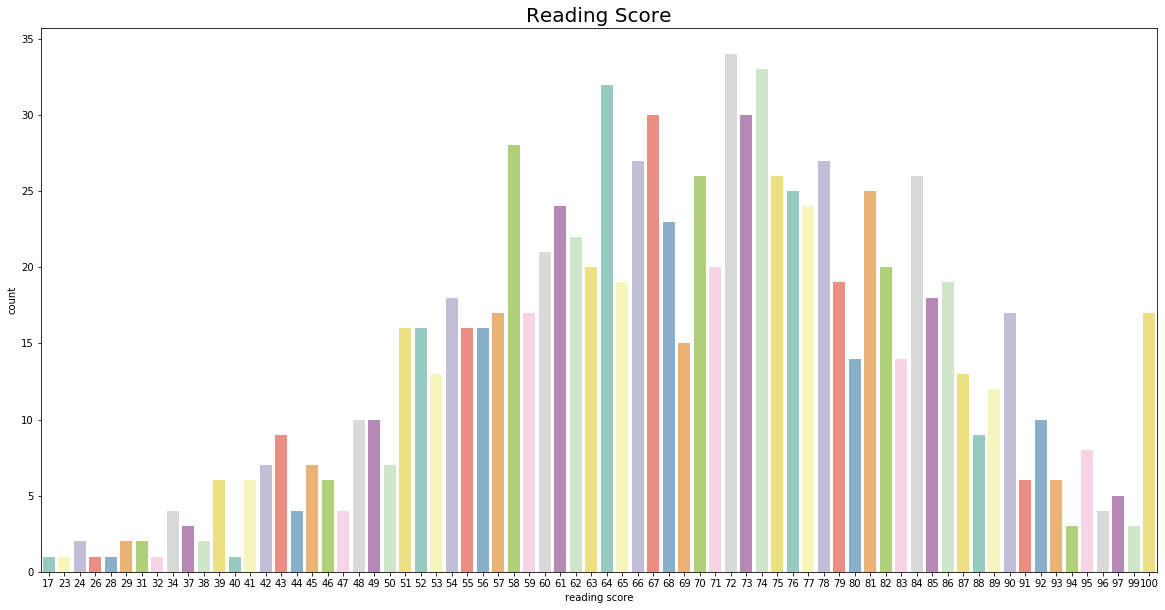

In [107]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['reading score'], palette = 'Set3')
plt.title('Reading Score',fontsize = 20)
plt.show()

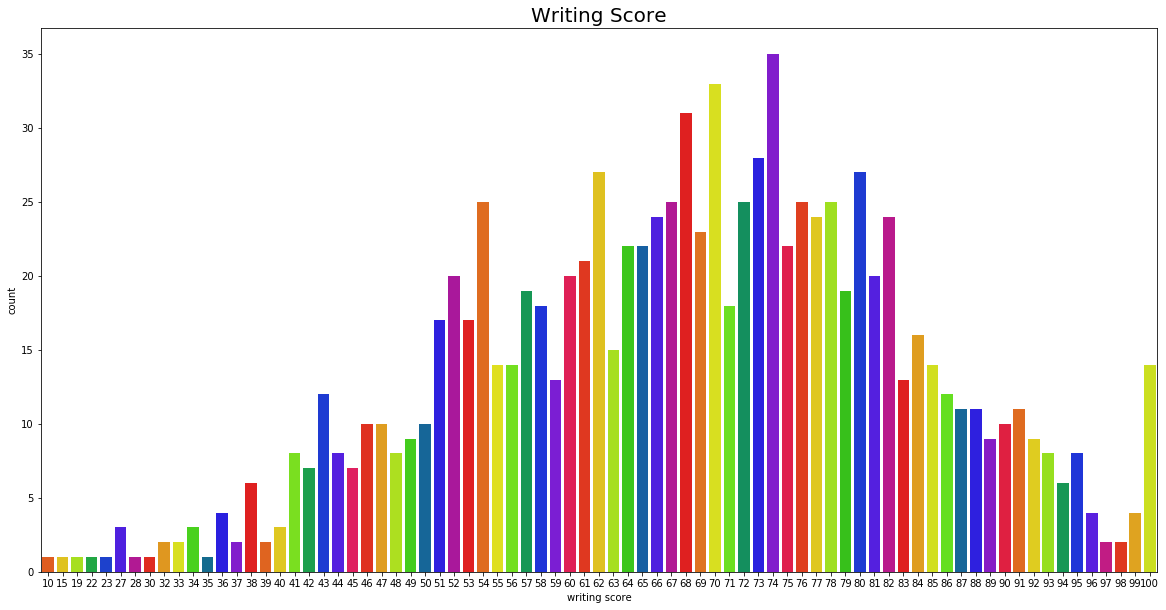

In [108]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['writing score'], palette = 'prism')
plt.title('Writing Score',fontsize = 20)
plt.show()

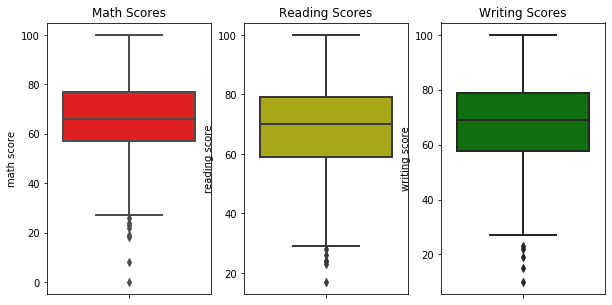

In [109]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('Math Scores')
sns.boxplot(y='math score',data=data,color='r',linewidth=2)
plt.subplot(1,3,2)
plt.title('Reading Scores')
sns.boxplot(y='reading score',data=data,color='y',linewidth=2)
plt.subplot(1,3,3)
plt.title('Writing Scores')
sns.boxplot(y='writing score',data=data,color='g',linewidth=2)
plt.show()

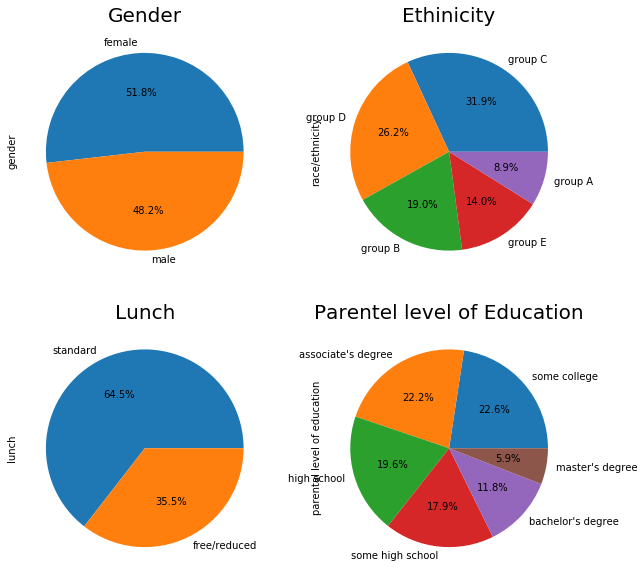

In [110]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title('Gender',fontsize = 20)
data['gender'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(2,2,2)
plt.title('Ethinicity',fontsize = 20)
data['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(2,2,3)
plt.title('Lunch',fontsize = 20)
data['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(2,2,4)
plt.title('Parentel level of Education',fontsize = 20)
data['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

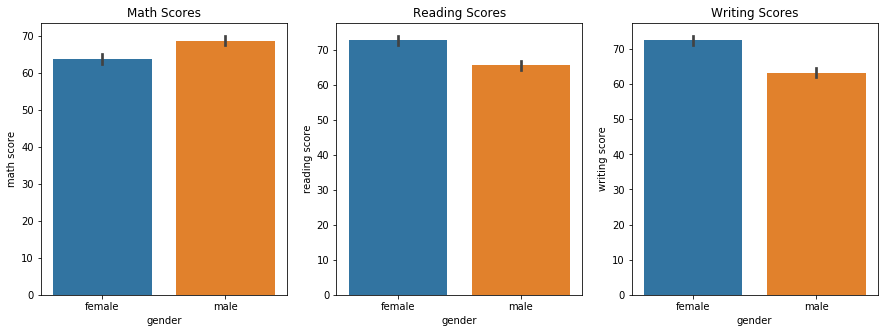

In [114]:
#Scores of male and female students in each subject
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=data)
plt.subplot(1,3,2)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=data)
plt.subplot(1,3,3)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=data)
plt.show()

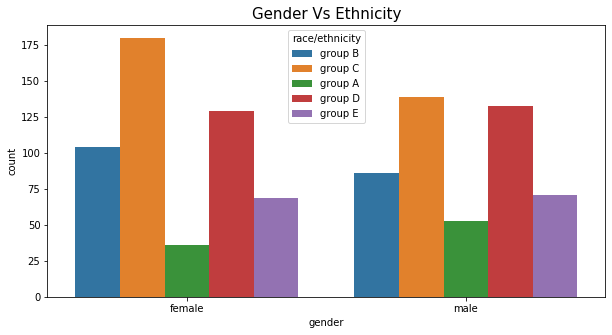

In [122]:
plt.figure(figsize=(10,5))
plt.title('Gender Vs Ethnicity',fontsize = 15)
sns.countplot(x="gender", hue="race/ethnicity", data=data)
plt.show()

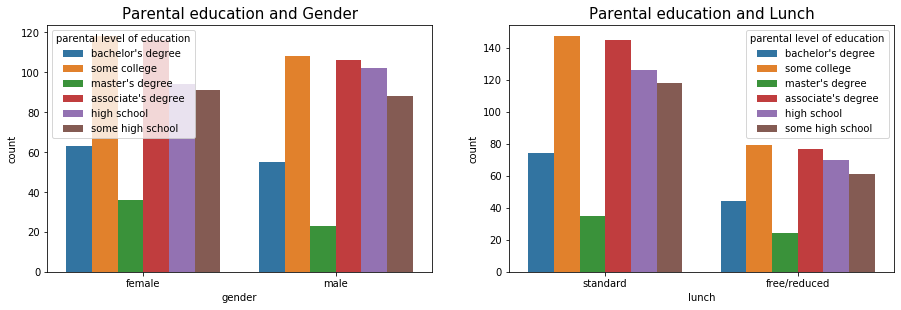

In [124]:

plt.figure(figsize=(40,10))

plt.subplot(251)
plt.title('Parental education and Gender',fontsize=15)
sns.countplot(hue="parental level of education", x="gender", data=data)
plt.subplot(252)
plt.title('Parental education and Lunch',fontsize=15)
sns.countplot(hue="parental level of education", x="lunch", data=data)

plt.show()

In [125]:
data['total marks']=data['math score']+data['reading score']+data['writing score']
data['percentage']=data['total marks']/300*100

Criteria of the grades are as follows:

85-100 : Grade A
70-84 : Grade B
55-69 : Grade C
35-54 : Grade D
0-35 : Grade E

In [127]:
def determine_grade(scores):
    if scores >= 85 and scores <= 100:
        return 'Grade A'
    elif scores >= 70 and scores < 85:
        return 'Grade B'
    elif scores >= 55 and scores < 70:
        return 'Grade C'
    elif scores >= 35 and scores < 55:
        return 'Grade D'
    elif scores >= 0 and scores < 35:
        return 'Grade E'
    
data['grades']=data['percentage'].apply(determine_grade)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
total marks                    1000 non-null int64
percentage                     1000 non-null float64
grades                         1000 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


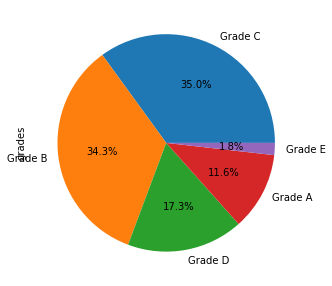

In [129]:
data['grades'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Most of the students got Grade B and Grade C

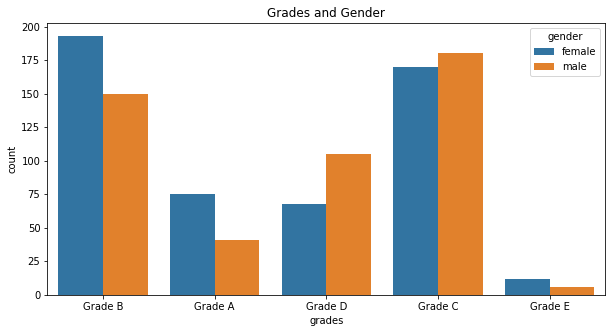

In [135]:
plt.figure(figsize=(10,5))
plt.title('Grades and Gender')
sns.countplot(hue="gender", x="grades", data=data)

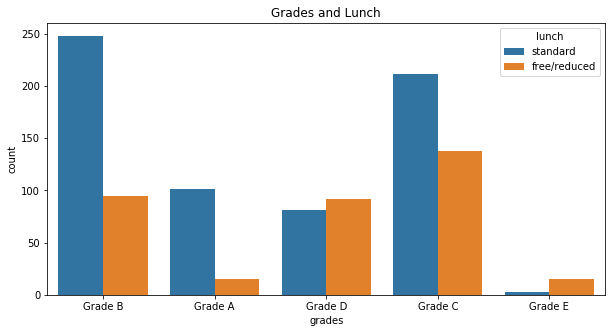

In [136]:
plt.figure(figsize=(10,5))
plt.title('Grades and Lunch')
sns.countplot(hue="lunch", x="grades", data=data)

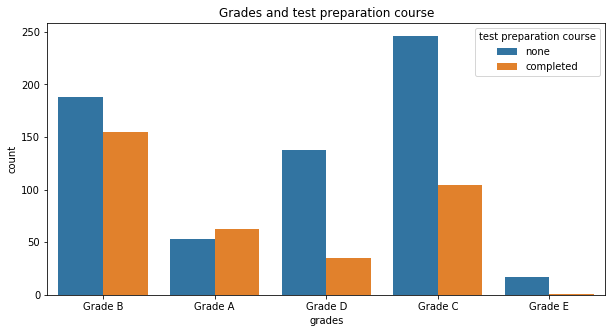

In [137]:
plt.figure(figsize=(10,5))
plt.title('Grades and test preparation course')
sns.countplot(hue="test preparation course", x="grades", data=data)

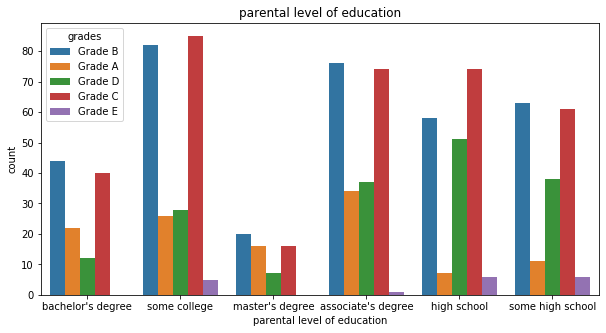

In [139]:
plt.figure(figsize=(10,5))
plt.title('parental level of education')
sns.countplot(x="parental level of education", hue="grades", data=data)